### TPC7: Construir uma aplicação para manipular polinómios

Depois da aula da semana passada, já tens algumas funções desenvolvidas que te irão ajudar a construir a aplicação que se descreve a seguir.

* Aquecimento: Instancia os seguintes exemplos num ficheiro de texto com o formato definido na última aula
    - `x^7 - 3.7x^4 + 5x^3 - 88`
    - `2x^2 + 17`
    - `7x^4 + 6x^3 - x^2 + 43`
    - `x^4`
    - `x^2`
    - `x^3`

* Desenvolve as seguintes funcionalidades que não foram trabalhadas na aula:
    1. Define uma função que dado um polinómio calcula a sua derivada;
    2. Define uma função que recebe dois polinómios `p1` e `p2` e calcula um novo polinómio correspondente à soma de `p1` e `p2`;
    3. Define uma função que recebe um polinómio e o desenha num gráfico.

* Num ficheiro Python, cria uma aplicação para manipular polinómios com as seguintes operações:
    1. Criar um polinómio interativamente;
    2. Ler uma lista de polinómios de um ficheiro;
    3. Listar polinómios: mostra numa tabela os polinómios carregados em memória, adicionando um número de ordem a cada um;
    4. Calcular o valor de um polinómio num ponto (usa o número de ordem para referenciar o polinómio);
    5. Listar polinómios com grau: à listagem anterior, acrescenta mais uma coluna com o grau;
    6. Maior grau: mostra o polinómio de maior grau e indica o seu número de ordem;
    7. Derivada: mostra uma tabela com os polinómios e as respetivas derivadas;
    8. Somar dois polinómios: indicando os seus números de ordem;
    9. Gerar um gráfico para o polinómio;
    10. Gravar num ficheiro os polinómios em memória;
    0. Sair da aplicação


In [2]:
p1=[(1,7), (-3.7, 4), (5,3), (-88,0)]
p2=[(2,2), (17,0)]
p3=[(7,4), (6,3), (-1,2), (43,0)]
p4=[(1,4)]
p5=[(1,2)]
p6=[(1,3)]
lista_polinomios=[p1,p2,p3, p4, p5, p6]
print(lista_polinomios)

[[(1, 7), (-3.7, 4), (5, 3), (-88, 0)], [(2, 2), (17, 0)], [(7, 4), (6, 3), (-1, 2), (43, 0)], [(1, 4)], [(1, 2)], [(1, 3)]]


In [3]:
#Aquecimento
def guardarPolinomios(lista, ficheiro):
    file = open(ficheiro, "w")
    for p in lista:
        for termo in p:
            coeficiente, grau = termo
            file.write(str(coeficiente) + ";" + str(grau) + "|")
        file.write("\n")
    file.close()

guardarPolinomios(lista_polinomios, "polinomiosTPC7.txt")

In [4]:
def derivadaPolinomios (lista):
    res=[]
    for p in lista:
        pol=[]
        for coeficiente, grau in p:
            coeficiente=coeficiente*grau
            grau=grau-1
            if (coeficiente != 0):
                pol.append((coeficiente, grau))
        res.append(pol)
    return res

derivadaPolinomios(lista_polinomios)

[[(7, 6), (-14.8, 3), (15, 2)],
 [(4, 1)],
 [(28, 3), (18, 2), (-2, 1)],
 [(4, 3)],
 [(2, 1)],
 [(3, 2)]]

In [94]:
def somaPolinomios(p1, p2):
    res = {}
    for coeficiente1, grau1 in p1:
        if grau1 in res:
            res[grau1] = res[grau1] + coeficiente1
        else:
            res[grau1] = coeficiente1
    for coeficiente2, grau2 in p2:
        if grau2 in res:
            res[grau2] = res[grau2] + coeficiente2 
        else:
            res[grau2] = coeficiente2
    resultado = [(coef, grau) for grau, coef in res.items()]

    return resultado
somaPolinomios(p3, p4)

[(8, 4), (6, 3), (-1, 2), (43, 0)]

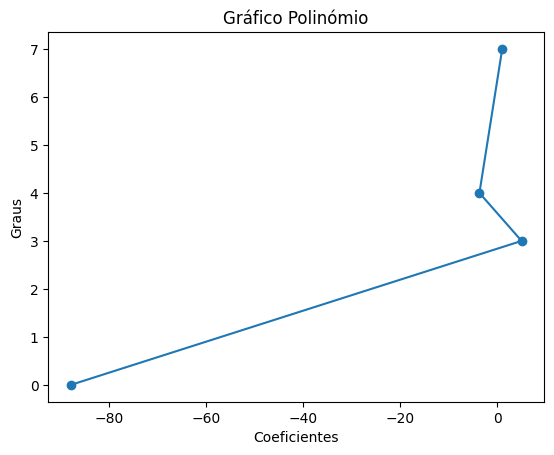

In [5]:
import matplotlib.pyplot as plt

def graficoPolinomio(p):
    coef=[]
    g=[]
    for termo in p:
        coeficiente, grau=termo
        coef.append(coeficiente)
        g.append(grau)
    
    x=coef
    y=g
    plt.plot(x,y, marker="o")
    plt.xlabel("Coeficientes")
    plt.ylabel("Graus")
    plt.title("Gráfico Polinómio")
    plt.show()

    return
graficoPolinomio(p1)



In [24]:
#Funções para a aplicação
def criarPolinomio():
    polinomio=[]
    i=1
    grau=int(input("Insira o maior grau do polinónio: "))
    while grau>=0:
        coeficiente=float(input("Introduza o coeficiente de grau " + str(i) + ":"))
        if (coeficiente!=0):
            termo=(coeficiente, grau)
            polinomio.append(termo)
        grau=grau-1
        i=i+1
    return polinomio

def lerPolinomio(ficheiro):
    lista=[]
    file= open(ficheiro,"r")
    for line in file: 
        termos = line.split("|")
        polinomio=[]
        for termo in termos:
            t= termo.split (";")
            if len(t)>1:
                coeficiente = t[0]
                grau = t[1]
                polinomio.append((coeficiente,grau))
        lista.append(polinomio)
    return lista
   
def listarPolinomio(lista):
    polinomio={}
    i=1
    while i<=len(lista):
        polinomio[i]=lista[i-1]
        i=i+1
    print("Nº de ordem :: Polinómio")
    print("------------------")
    for chave in polinomio:
        print(chave," | ", polinomio[chave])
    return 

def pot(a,b):
    res=1
    while b>0:
        res=res*a
        b=b-1
    return res

def calcularPolinomio(lista, nº, x):
    polinomio={}
    i=1
    while i<=len(lista):
        polinomio[i]=lista[i-1]
        i=i+1
    res = 0
    p=polinomio[nº]
    for termo in p:
        coeficiente, grau = termo 
        res=res+coeficiente * pot(x,grau)
    return res
    
def listarComGrau(lista):
    polinomio={}
    i=1
    while i<=len(lista):
        polinomio[i]=[lista[i-1], lista[i-1][0][1]]
        i=i+1
    print("Nº de ordem :: Polinómio :: Grau")
    print("--------------------------------")
    for chave in polinomio:
        pol, grau=polinomio[chave]
        print(chave," | ", pol, " |", grau)
    return 
    

def maiorGrau(lista):
    maior=0
    polinomio={}
    i=1
    while i<=len(lista):
        polinomio[i]=[lista[i-1], lista[i-1][0][1]]
        i=i+1
        for chave, valor in polinomio.items():
            grau=valor[1]
            if grau>maior:
                maior=grau
                nº=chave
    return (nº, maior)

def tabelaDerivada(lista):
    res=[]
    for p in lista:
        pol=[]
        for coeficiente, grau in p:
            coeficiente=coeficiente*grau
            grau=grau-1
            if (coeficiente != 0):
                pol.append((coeficiente, grau))
        res.append(pol)
    derivada={}
    i=1
    while i<=len(lista):
        derivada[i]=[lista[i-1], res[i-1]]
        i=i+1
    print("Nº de ordem :: Polinómio :: Derivada")
    print("------------------------------------")
    for chave in derivada:
        poli, deriv= derivada[chave]
        print(chave," | ", poli, " |", deriv)
    return 


def somaComNumero(lista):
    polinomio = {}
    i = 1
    while i <= len(lista):
        polinomio[i] = lista[i - 1]
        i = i + 1
    n1 = int(input("Chave do pol1: "))
    n2 = int(input("Chave do pol2: "))
    p1 = polinomio.get(n1)
    p2 = polinomio.get(n2)
    res = {}
    for coeficiente1, grau1 in p1:
        if grau1 in res:
            res[grau1] = res[grau1] + coeficiente1
        else:
            res[grau1] = coeficiente1
    for coeficiente2, grau2 in p2:
        if grau2 in res:
            res[grau2] = res[grau2] + coeficiente2 
        else:
            res[grau2] = coeficiente2
    resultado = [(coef, grau) for grau, coef in res.items()]

    return resultado

def graficoComNumero(lista):
    import matplotlib.pyplot as plt
    coef=[]
    g=[]
    polinomio = {}
    i = 1
    while i <= len(lista):
        polinomio[i] = lista[i - 1]
        i = i + 1
    n= int(input("Chave do polinómio que deseja representar graficamente: "))
    p = polinomio.get(n)
    for termo in p:
        coeficiente, grau=termo
        coef.append(coeficiente)
        g.append(grau)
    
    x=coef
    y=g
    plt.plot(x,y, marker="o")
    plt.xlabel("Coeficientes")
    plt.ylabel("Graus")
    plt.title("Gráfico Polinómio")
    plt.show()

    return
    

In [23]:
#Aplicação
p1=[(1,7), (-3.7, 4), (5,3), (-88,0)]
p2=[(2,2), (17,0)]
p3=[(7,4), (6,3), (-1,2), (43,0)]
p4=[(1,4)]
p5=[(1,2)]
p6=[(1,3)]
lista_polinomios=[p1,p2,p3, p4, p5, p6]
print (" * (1) Criar polinómio \n * (2) Ler polinómios de um ficheiro \n * (3) Listar polinómios \n * (4) Calcular polinómio \n * (5) Listar polinómios com grau \n * (6) Polinómio de maior grau \n * (7) Derivada de um polinómio \n * (8) Somar polinómios \n * (9) Gráfico de um polinómio \n * (10) Gravar polinómios \n * (0) Sair")
x=int(input("Escolha a opção que deseja: "))
while (x!=0):
    if (x==1):
        p=criarPolinomio() 
        lista_polinomios.append(p)
        x=int(input("Escolha a opção que deseja: "))

    elif (x==2):
        ficheiro=input("Qual o nome do ficheiro do qual quer ler os polinómios?: ")
        lerPolinomio(ficheiro)
        x=int(input("Escolha a opção que deseja: "))

    elif (x==3):
        listarPolinomio(lista_polinomios)
        x=int(input("Escolha a opção que deseja: "))
        
    elif(x==4):
        nº=int(input("Qual o nº do polinómio que deseja utilizar?: "))
        x=int(input("Qual o valor de x que pretende usar para o cálculo do polinómio?: "))
        calcularPolinomio(lista_polinomios, nº, x)
        x=int(input("Escolha a opção que deseja: "))

    elif (x==5):
        listarComGrau(lista_polinomios)
        x=int(input("Escolha a opção que deseja: "))

    elif (x==6):
        maiorGrau(lista_polinomios)
        x=int(input("Escolha a opção que deseja: "))
    
    elif (x==7):
        tabelaDerivada(lista_polinomios)
        x=int(input("Escolha a opção que deseja: "))
    
    elif (x==8):
        somaComNumero(lista_polinomios)
        x=int(input("Escolha a opção que deseja: "))
    
    elif (x==9):
        graficoComNumero(lista_polinomios)
        x=int(input("Escolha a opção que deseja: "))

    elif (x==10):
        ficheiro=input("Qual o nome do ficheiro que pretende utilizar para guardar os polinómios?: (.txt)")
        guardarPolinomios(lista_polinomios, ficheiro)
        x=int(input("Escolha a opção que deseja: "))
    
        
print("Escolheu sair.")


 * (1) Criar polinómio 
 * (2) Ler polinómios de um ficheiro 
 * (3) Listar polinómios 
 * (4) Calcular polinómio 
 * (5) Listar polinómios com grau 
 * (6) Polinómio de maior grau 
 * (7) Derivada de um polinómio 
 * (8) Somar polinómios 
 * (9) Gráfico de um polinómio 
 * (10) Gravar polinómios 
 * (0) Sair
Escolheu sair.
